## Energy Market in Tanzania: Market Entry Considerations

In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Avenir"
# matplotlib.use('agg')

In [2]:
# Define a fn to plot a heatmap
# def heatmap_plotter(df = i_hh_energy,
#                     col_name_1='cooking_fuel',
#                     col_name_2='lighting_fuel',
#                     plot_title='Relationship of cooking and lighting fuel use',
#                     xlab='Lighting Fuel',
#                     ylab='Cooking Fuel',
#                     fig_name='hmp_cooking_and_lighting_fuel_use',
#                     figure_height=8):  # Adjust the figure height as needed

def heatmap_plotter(df,
                    col_name_1,
                    col_name_2,
                    plot_title,
                    xlab,
                    ylab,
                    fig_name):

    # Create a crosstab
    crosstab = pd.crosstab(df[col_name_1], df[col_name_2])

    # Calculate the total count of all observations
    total_count = crosstab.values.sum()

    # Calculate the percentages by dividing each cell by the total count
    percentage_crosstab = (crosstab / total_count) * 100

    # Create a figure with the specified height
    plt.figure(figsize=(10, 6))  # Adjust figure width and height as needed
    ax = plt.gca()

    # Customize chart title and labels
    plt.title(plot_title, fontsize=15, fontweight='bold', color='navy')

    # Create a heatmap to visualize relationships with custom styling
    sns.heatmap(percentage_crosstab, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax, annot_kws={"size": 12})

    # Customize tick parameters
    ax.tick_params(axis='x', which='both', labelrotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Customize grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.6, color='gray')

    # Set x-axis and y-axis labels
    ax.set_xlabel(xlab, fontsize=14, fontweight='bold', color='dimgray')
    ax.set_ylabel(ylab, fontsize=14, fontweight='bold', color='dimgray')

    # Set x-axis and y-axis tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold', color='dimgray')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold', color='dimgray')

    # Manually adjust the figure size and margins
    plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)

    # Show the chart
    plt.show()

    # Save in outputs folder:
    # output_path = os.path.join(output_directory, f'{fig_name}.png')
    # plt.savefig(output_path, dpi=300, format='png')

    # Get the current working directory
    current_directory = os.getcwd()
    # Save the figure in the 'outputs' sub-folder
    output_path = current_directory.replace('data_and_analysis','reports_and_output/') + fig_name +'.png'
    plt.savefig(output_path, dpi=300, format='png')

In [3]:
# Define a bar_plotter function
# def bar_plotter(df = i_hh_energy,
#                 column_name = 'cooking_fuel',
#                 plot_title = 'Types of Cooking fuel used across households',
#                 xlab = 'Cooking Fuel',
#                 ylab = '%age of Households',
#                 fig_name = 'Distribution of Cooking Fuels'):

def bar_plotter(df,
                column_name,
                plot_title,
                xlab,
                ylab,
                fig_name):

    """This funtion plots barplots given 1 dataframe column
        Defaults are set for the Plot of review of cooking fuels"""
    # Set a custom color palette
    custom_palette = sns.color_palette("Set2")

    # Create a figure and axes with custom background color
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.set_facecolor('#f0f0f0')  # Light grey background color

    # Plot the distribution of cooking fuel with custom styling
    item_counts = df[column_name].value_counts(normalize = True) * 100

    sns.barplot(x = item_counts.index,
                y = item_counts.values,
                palette = custom_palette)


    # Customize chart title and labels
    plt.title(plot_title, fontsize=15, color='navy')
    plt.xticks(rotation=45, fontsize=11, color='dimgray')
    plt.yticks(fontsize=11, color='dimgray')
    plt.xlabel(xlab, fontsize=12, color='black')
    plt.ylabel(ylab, fontsize=12, color='black')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Customize grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.6, color='gray')

    # Customize tick parameters
    ax.tick_params(axis='x', which='both', bottom=False)

    # Annotate the bars with values (optional)
    for i, v in enumerate(item_counts.values):
        plt.text(i, v, f'{v:.2f}%', fontsize=12, ha='center', va='bottom', color='black')

    plt.show()

    # Adjust the figure size and margins
    plt.gcf().subplots_adjust(left=0.1, right=0.9, bottom=0.3, top=0.9)
    # output_string = fig_name + '.png'
    # plt.savefig(output_string, dpi = 300, format = 'png')
    current_directory = os.getcwd()
    # Save the figure in the 'outputs' sub-folder
    output_path = current_directory.replace('data_and_analysis','reports_and_output/') + fig_name +'.png'
    plt.savefig(output_path, dpi=300, format='png')

In [4]:
def chloro_plotter(map_df,
                   main_title,
                   subtitle,
                   fig_name):
    ## Visualisation
    # Merge the percentage data with a GeoDataFrame containing region geometries
    merged_gdf = gdf.merge(map_df, left_on='Region_Nam', right_index=True)

    # Create the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(20,12))
    merged_gdf.plot(column='electricity_source', cmap='YlGn', linewidth=0.8, ax=ax, legend=True)

    #main_title = 'Households with no Electricity Access'
    #subtitle = 'Households with no access to the Tanesco grid, solar panels, community generators or motor batteries'
    ax.set_title(main_title, fontsize=16)
    plt.text(0.5, -0.1, subtitle, transform=ax.transAxes, ha='center', fontsize=12, color='gray')
    plt.axis('off')  # Turn off axis

    # Annotate each region with the name and value
    for idx, row in merged_gdf.iterrows():
        region_name = row['Region_Nam']
        percentage = row['electricity_source']
        centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y

        # Determine the background color and set text color accordingly
        background_color = 'white' if percentage > 45 else 'black'

        # Annotate the region name with the determined text color
        plt.annotate(region_name, xy=(centroid_x, centroid_y), xytext=(0, -20),
                     textcoords='offset points', fontsize=12, color=background_color, ha='center', weight = 'bold')

        # Annotate the percentage below the region name
        plt.annotate(f"{percentage:.2f}%", xy=(centroid_x, centroid_y), xytext=(0, 5),
                     textcoords='offset points', fontsize=12, color = background_color, ha='center', weight = 'bold')

    plt.show()
    #plt.savefig( fig_name+'.png', dpi = 300, bbox_inches = 'tight')
    # Get the current working directory
    current_directory = os.getcwd()
    # Save the figure in the 'outputs' sub-folder
    output_path = current_directory.replace('data_and_analysis','reports_and_output/') + fig_name +'.png'
    plt.savefig(output_path, dpi=300, format='png')

In [5]:
# Set some constants
# https://data.worldbank.org/country/TZ
total_population = 65497748
# 2021 Exchange rate (USD): 0.0004
# https://www.exchangerates.org.uk/TZS-USD-spot-exchange-rates-history-2021.html
fx = 0.0004

In [6]:
# The first step is to fetch all the data
# determine the relative path of the folder holding the csv files
folder_path = "./TZA_2020_NPS-R5_v02_M_CSV"

In [7]:
# Initialize an empty dictionary to store the data (household and consumption data specifically)
data_dict = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("hh_") or filename.startswith("consumption_"):
        # Create the variable name (removing the .csv extension)
        var_name = os.path.splitext(filename)[0]
        
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        data_dict[var_name] = pd.read_csv(file_path)

In [8]:
# List of all datasets:
# data_dict.keys()

In [9]:
# Load the GeoJSON file
# Important for analysing geo data
# Downloaded from: https://energydata.info/dataset/tanzania-region-district-boundary-2012
gdf = gpd.read_file('regions.geojson')
gdf.head()


,Region_Cod,Region_Nam,geometry
0,06,Pwani,"MULTIPOLYGON (((39.32625 -8.29375, 39.32662 -8..."
1,24,Simiyu,"MULTIPOLYGON (((33.91144 -2.18240, 33.91730 -2..."
2,25,Geita,"MULTIPOLYGON (((31.81754 -2.70194, 31.81611 -2..."
3,13,Singida,"MULTIPOLYGON (((34.92803 -4.26680, 34.92803 -4..."
4,11,Iringa,"MULTIPOLYGON (((34.93545 -6.89101, 34.93821 -6..."


In [81]:
# region_code_map = gdf[['Region_Cod','Region_Nam']]
# region_code_map['Region_Cod'] = region_code_map['Region_Cod'] .astype(int)

<ipython-input-81-6dcc56f6ff8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_code_map['Region_Cod'] = region_code_map['Region_Cod'] .astype(int)


From the review of the data, it seems like the important datasets are:
1. hh_sec_a {y5_hhid}
2. hh_sec_b {y5_hhid, indidy5}
3. hh_sec_e2 (occupation data) {y5_hhid, indidy5}
3. hh_sec_e3 (firewood collection shows source of energy) {y5_hhid, indidy5}
4. hh_seg_g (financial status) {y5_hhid, indidy5}
5. hh_sec_j1 (food consumed) {y5_hhid, itemcode
6. hh_sec_m (household assets) {y5_hhid, itemcode}

### Columns of interest

In [10]:
# a_hh_basic = data_dict['hh_sec_a'][['y5_hhid','y5_rural','hh_a02_1',]].rename(columns = {'hh_a02_1':'location'})
#
# # getting region and district info from the location column "hh_a02_1"
# a_hh_basic['location'] = a_hh_basic['location'].astype(str)
#
# # extract all but the last xter
# a_hh_basic['region'] = a_hh_basic['location'].str[:-1]
# # extract the last xter
# a_hh_basic['district'] = a_hh_basic['location'].str[-1]
#
# # convert region/district back into integers
# a_hh_basic['region'] = a_hh_basic['region'].astype(int)
# a_hh_basic['district'] = a_hh_basic['district'].astype(int)
# a_hh_basic = a_hh_basic.drop(columns = ['location'])
#
# # [OBS] region data does not align perfectly with "MAGERESHO YA MIKOA NA WILAYA" section
# # of the questionairre
# a_hh_basic.groupby(['region', 'district']).size().reset_index(name='count')

In [11]:
# Consumption data:
# Construction from nps_wave_5_report.pdf, appendix A.
# consumption is for 28 days
# data dictionaty: https://microdata.worldbank.org/index.php/catalog/5639/data-dictionary/F65?file_name=consumption_real_y5
# data_dict['consumption_real_y5']#.columns

#### Consumption data

In [12]:
consumption_data = data_dict['consumption_real_y5']
consumption_data = consumption_data[['y5_hhid','urban','region','district','hhsize','nf_clothing', 'nf_utilities', 'nf_hhexpenses', 'nf_transport', 'nf_communic', 'nf_recreat', 'nf_other', 'dur_exp', 'rent_exp', 'foodIN', 'foodOUT', 'educa', 'health']]

In [13]:
# Convert currency
consumption_data.iloc[:, 5:] = consumption_data.iloc[:, 5:] * fx

#### Energy data

In [14]:
i_hh_energy = data_dict['hh_sec_i'][['y5_hhid','hh_i16','hh_i16_1','hh_i17','hh_i18']].rename(columns = {
    'hh_i16':'cooking_fuel',
    'hh_i16_1':'cooking_stove',
    'hh_i17':'lighting_fuel',
    'hh_i18':'electricity_source'
})

In [15]:
# Create dictionaries to help in renaming the values in the columns
# Fuel used for cooking
ckfuel_dict = { 1:'Firewood',
                2:'Paraffin',
                3:'Electricity',
                4:'Gas',
                5:'Charcoal',
                6:'Animal Residue',
                7:'Gas (Biogas)'}

# Assumptions made in assigning the codes to the stove types, since the questionnaire only has 2 codes while the data has 4 outcomes
stove_dict = {  1:'stone',
                2:'other self-built',
                3:'manufactured',
                4:'other'}

light_dict = {  1:'Electricity',
                2:'Solar',
                3:'Gas',
                4:'Gas (Biogas)',
                5:'Lamp oil',
                6:'Candle',
                7:'Firewood',
                8:'Private Generator',
                9:'Torch',
                10:'Other'}

elec_dict = {   1:'Tanesco',
                2:'Community Generator',
                3:'Solar Panels',
                4:'Own Generator',
                5:'Car Battery',
                6:'Motorcycle Battery',
                7:'Other'}

In [16]:
#df['string_column'] = df['code_column'].map(code_to_string)
i_hh_energy['cooking_fuel'] = i_hh_energy['cooking_fuel'].map(ckfuel_dict).fillna('Other')
i_hh_energy['cooking_stove'] = i_hh_energy['cooking_stove'].map(stove_dict).fillna('Other')
i_hh_energy['lighting_fuel'] = i_hh_energy['lighting_fuel'].map(light_dict).fillna('Other')
i_hh_energy['electricity_source'] = i_hh_energy['electricity_source'].map(elec_dict).fillna('no-electricity')
i_hh_energy

,y5_hhid,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1000-001-01,Firewood,stone,Solar,Solar Panels
1,1000-001-02,Charcoal,manufactured,Candle,no-electricity
2,1000-001-03,Firewood,stone,Solar,Solar Panels
3,1000-001-06,Firewood,stone,Electricity,Tanesco
4,1001-001-01,Firewood,stone,Solar,Community Generator
...,...,...,...,...,...
4704,9807-001-99,Electricity,Other,Electricity,Tanesco
4705,9808-001-99,Electricity,Other,Electricity,Tanesco
4706,9809-001-99,Firewood,stone,Lamp oil,no-electricity
4707,9810-001-99,Charcoal,manufactured,Solar,Solar Panels


In [17]:
# Households using certain fuel types
cooking_fuel_counts = i_hh_energy['cooking_fuel'].value_counts(normalize = True) * 100
lighting_fuel_counts = i_hh_energy['lighting_fuel'].value_counts(normalize = True) * 100
electricity_source_counts = i_hh_energy['electricity_source'].value_counts(normalize = True) * 100

In [18]:
i_hh_energy

,y5_hhid,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
0,1000-001-01,Firewood,stone,Solar,Solar Panels
1,1000-001-02,Charcoal,manufactured,Candle,no-electricity
2,1000-001-03,Firewood,stone,Solar,Solar Panels
3,1000-001-06,Firewood,stone,Electricity,Tanesco
4,1001-001-01,Firewood,stone,Solar,Community Generator
...,...,...,...,...,...
4704,9807-001-99,Electricity,Other,Electricity,Tanesco
4705,9808-001-99,Electricity,Other,Electricity,Tanesco
4706,9809-001-99,Firewood,stone,Lamp oil,no-electricity
4707,9810-001-99,Charcoal,manufactured,Solar,Solar Panels


#### Energy visualisations

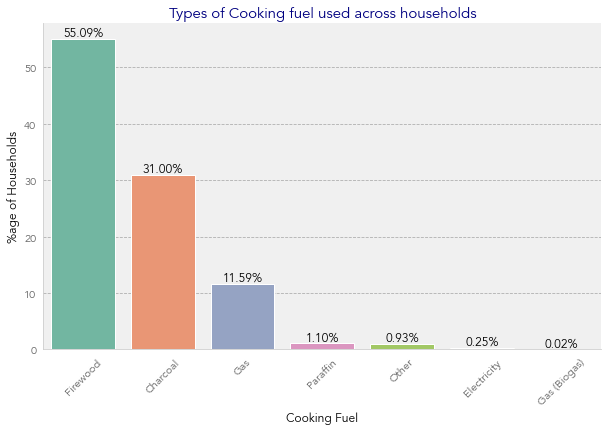

<Figure size 432x288 with 0 Axes>

In [19]:
bar_plotter(df = i_hh_energy,
            column_name = 'cooking_fuel',
            plot_title = 'Types of Cooking fuel used across households',
            xlab = 'Cooking Fuel',
            ylab = '%age of Households',
            fig_name = 'bplt_cooking_fuels')

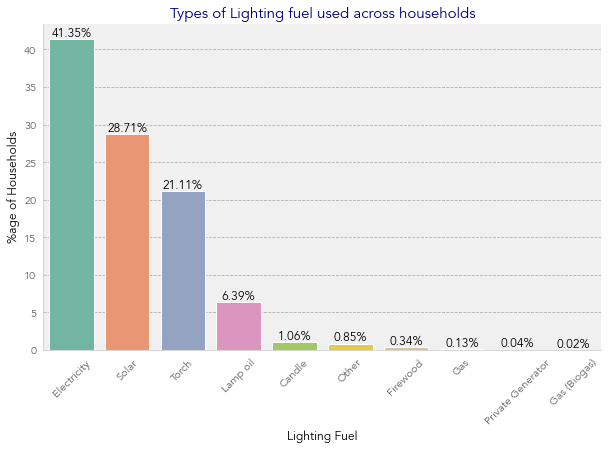

<Figure size 432x288 with 0 Axes>

In [20]:
bar_plotter(df = i_hh_energy,
            column_name = 'lighting_fuel',
            plot_title = 'Types of Lighting fuel used across households',
            xlab = 'Lighting Fuel',
            ylab = '%age of Households',
            fig_name = 'bplt_lighting_fuels')

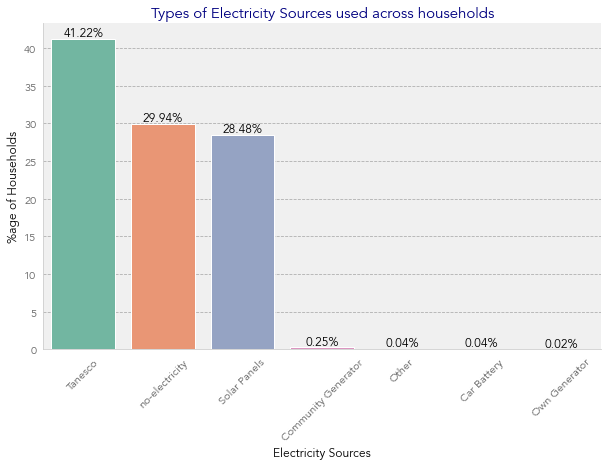

<Figure size 432x288 with 0 Axes>

In [21]:
bar_plotter(df = i_hh_energy,
            column_name = 'electricity_source',
            plot_title = 'Types of Electricity Sources used across households',
            xlab = 'Electricity Sources',
            ylab = '%age of Households',
            fig_name = 'bplt_electricity_sources')

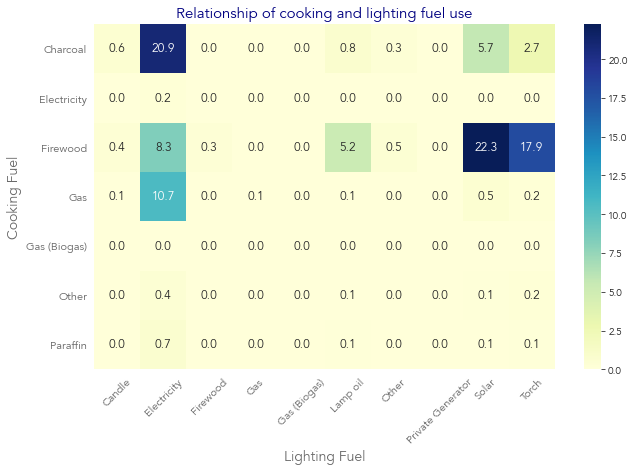

<Figure size 432x288 with 0 Axes>

In [22]:
heatmap_plotter(df = i_hh_energy,
                col_name_1='cooking_fuel',
                col_name_2='lighting_fuel',
                plot_title='Relationship of cooking and lighting fuel use',
                xlab='Lighting Fuel',
                ylab='Cooking Fuel',
                fig_name='hmp_cooking_and_lighting_fuel_use')

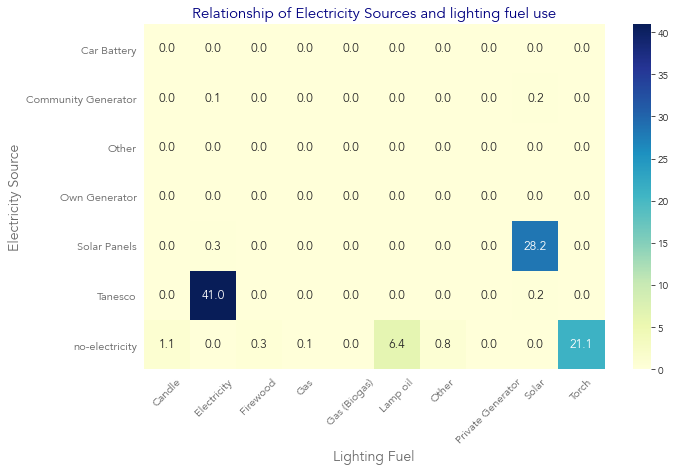

<Figure size 432x288 with 0 Axes>

In [23]:
heatmap_plotter(df = i_hh_energy,
                col_name_1='electricity_source',
                col_name_2='lighting_fuel',
                plot_title='Relationship of Electricity Sources and lighting fuel use',
                xlab='Lighting Fuel',
                ylab='Electricity Source',
                fig_name='hmp_electricity_and_lighting_fuel_use')

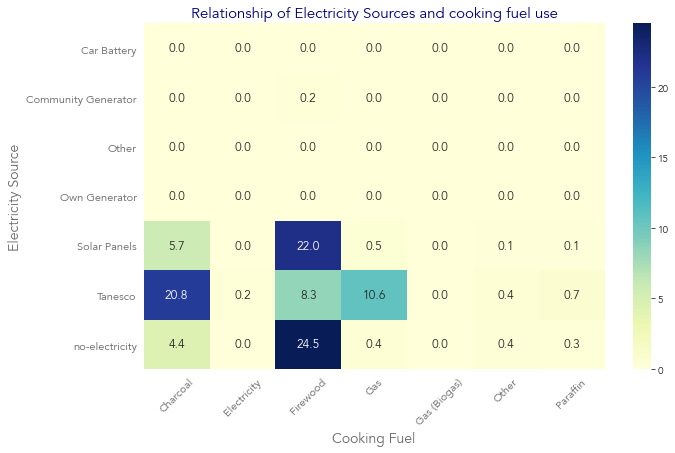

<Figure size 432x288 with 0 Axes>

In [24]:
heatmap_plotter(df = i_hh_energy,
                col_name_1='electricity_source',
                col_name_2='cooking_fuel',
                plot_title='Relationship of Electricity Sources and cooking fuel use',
                xlab='Cooking Fuel',
                ylab='Electricity Source',
                fig_name='hmp_electricity_and_cooking_fuel_use')

#### Consumption + Energy

In [25]:
##
consumption_data_w_energy = consumption_data.merge(i_hh_energy, how = 'left', on = 'y5_hhid')
#consumption_data_w_energy

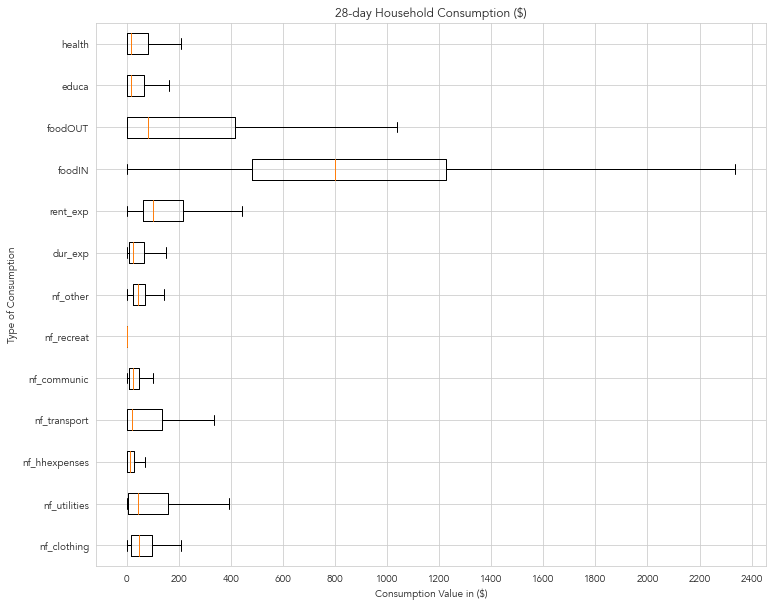

<Figure size 432x288 with 0 Axes>

In [26]:
# Let's visualise the consumption of the households
plt.figure(figsize=(12, 10))
plt.boxplot(consumption_data.iloc[:, 5:].values,
            labels = consumption_data.iloc[:, 5:].columns,
            vert=False,
            showfliers = False)
plt.xticks(range(0, 2500, 200))
plt.title('28-day Household Consumption ($)')
plt.xlabel('Consumption Value in ($)')
plt.ylabel('Type of Consumption')
plt.show()

# plt.savefig('hh_consumption.png', dpi = 300, format = 'png')

# Get the current working directory
current_directory = os.getcwd()
# Save the figure in the 'outputs' sub-folder
output_path = current_directory.replace('data_and_analysis','reports_and_output/') + 'hh_consumption' +'.png'
plt.savefig(output_path, dpi=300, format='png')

In [27]:
#Filter out non-grid hhs
non_grid_consumption = consumption_data_w_energy[consumption_data_w_energy['electricity_source'] != 'Tanesco']

In [28]:
# convert to usd
non_grid_consumption_usd = pd.DataFrame(data = non_grid_consumption.values,
                                        index = non_grid_consumption.index,
                                        columns = non_grid_consumption.columns)
non_grid_consumption_usd.iloc[:,5:18] = non_grid_consumption_usd.iloc[:,5:18] * fx

In [29]:
non_grid_consumption_usd

,y5_hhid,urban,region,district,hhsize,nf_clothing,nf_utilities,nf_hhexpenses,nf_transport,nf_communic,...,dur_exp,rent_exp,foodIN,foodOUT,educa,health,cooking_fuel,cooking_stove,lighting_fuel,electricity_source
7,1309-001-01,2,7,74,8,0.0968,0.107264,0.02464,0.3424,0.0384,...,0.054934,0.051134,1.664,0.39104,0.0096,0.0,Firewood,stone,Torch,no-electricity
9,1342-001-01,2,7,71,6,0.02272,0.069952,0.0,0.0,0.0096,...,0.014165,0.124489,0.40144,0.11648,0.1904,0.0,Charcoal,manufactured,Torch,no-electricity
13,1364-001-01,2,7,71,1,0.02704,0.0,0.0016,0.000832,0.0192,...,0.003605,0.038271,0.0,0.188032,0.0,0.0,Charcoal,other,Solar,Other
17,1438-001-03,2,7,72,3,0.02464,0.056128,0.00384,0.073216,0.01152,...,0.005811,0.0384,0.297856,0.256256,0.0,0.017264,Charcoal,manufactured,Torch,no-electricity
23,1552-001-01,2,7,72,3,0.01504,0.0192,0.00096,0.014976,0.00576,...,0.000966,0.035561,0.19729,0.132288,0.0,0.03536,Charcoal,manufactured,Torch,no-electricity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,2411-001-03,1,51,511,3,0.0376,0.023872,0.01152,0.0,0.0192,...,0.006879,0.047193,0.638144,0.11648,0.0048,0.0104,Firewood,stone,Lamp oil,no-electricity
4695,2373-001-03,1,51,511,4,0.02288,0.016192,0.0,0.03328,0.01152,...,0.01187,0.027061,0.509323,0.02496,0.0048,0.02496,Firewood,stone,Lamp oil,no-electricity
4698,2369-001-01,1,51,511,2,0.00256,0.037312,0.0,0.00832,0.01536,...,0.001523,0.057667,0.275392,0.0,0.0,0.00208,Firewood,stone,Lamp oil,no-electricity
4703,2313-001-04,1,51,511,4,0.0808,0.016192,0.0,0.05824,0.0,...,0.006278,0.05889,0.492445,0.0,0.0,0.0,Firewood,stone,Lamp oil,no-electricity


In [103]:
# Select columns, and coerce them into ints
consumption_selected = non_grid_consumption_usd[['region','hhsize', 'nf_clothing','nf_utilities', 'nf_hhexpenses', 'nf_transport', 'nf_communic','nf_recreat', 'nf_other', 'dur_exp', 'rent_exp','educa', 'health']]

#convert cols from objects to int
columns_to_convert = consumption_selected.columns

for column in columns_to_convert:
    consumption_selected[column] = pd.to_numeric(consumption_selected[column], errors='coerce')

<ipython-input-103-408cec6c6f0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_selected[column] = pd.to_numeric(consumption_selected[column], errors='coerce')


In [111]:
# get region from gdf
gdf['Region_Cod'] = gdf['Region_Cod'].astype(int)
consumption_selected = consumption_selected.merge(gdf, how = 'left', right_on = 'Region_Cod', left_on = 'region')

In [116]:
avg_monthly_exp = consumption_selected[['Region_Nam','nf_clothing', 'nf_utilities', 'nf_hhexpenses','nf_transport', 'nf_communic', 'nf_recreat', 'nf_other', 'dur_exp',
       'rent_exp', 'educa', 'health']].groupby('Region_Nam').mean().sum(axis = 1)

In [144]:
consumption_selected[['Region_Nam','nf_clothing', 'nf_utilities', 'nf_hhexpenses','nf_transport', 'nf_communic', 'nf_recreat', 'nf_other', 'dur_exp',
       'rent_exp', 'educa', 'health']].groupby('Region_Nam').median()

,nf_clothing,nf_utilities,nf_hhexpenses,nf_transport,nf_communic,nf_recreat,nf_other,dur_exp,rent_exp,educa,health
Region_Nam,,,,,,,,,,,
Arusha,0.015600,0.004160,0.004224,0.00000,0.00624,0.0,0.014400,0.007417,0.032616,0.006896,0.000000
Dar es salaam,0.016000,0.044992,0.000960,0.02912,0.01248,0.0,0.018240,0.007443,0.058048,0.008400,0.005408
Dodoma,0.016800,0.005376,0.005760,0.00000,0.00768,0.0,0.014400,0.003646,0.031644,0.005440,0.006240
Geita,0.011440,0.001664,0.005760,0.00000,0.00384,0.0,0.012480,0.003097,0.025598,0.007760,0.004160
Iringa,0.010720,0.003840,0.007680,0.00000,0.00384,0.0,0.010560,0.004911,0.028349,0.008800,0.003120
Kagera,0.011200,0.002496,0.004160,0.00000,0.00480,0.0,0.010560,0.002699,0.027127,0.008000,0.005200
Kaskazini Pemba,0.022120,0.010432,0.000000,0.00000,0.00960,0.0,0.017280,0.007112,0.047221,0.004800,0.003016
Kaskazini Unguja,0.024800,0.011520,0.000000,0.00832,0.00960,0.0,0.016512,0.006879,0.067476,0.004800,0.000000
Katavi,0.013760,0.006976,0.007152,0.00832,0.00384,0.0,0.013248,0.003835,0.028800,0.003240,0.005720


In [122]:
avg_monthly_exp = pd.DataFrame(avg_monthly_exp).rename(columns = {0:'avg_exp_monthly'})

In [123]:
avg_monthly_exp

,avg_exp_monthly
Region_Nam,
Arusha,0.213314
Dar es salaam,0.448586
Dodoma,0.322600
Geita,0.147371
Iringa,0.185703
Kagera,0.173984
Kaskazini Pemba,0.409876
Kaskazini Unguja,0.208585
Katavi,0.247702


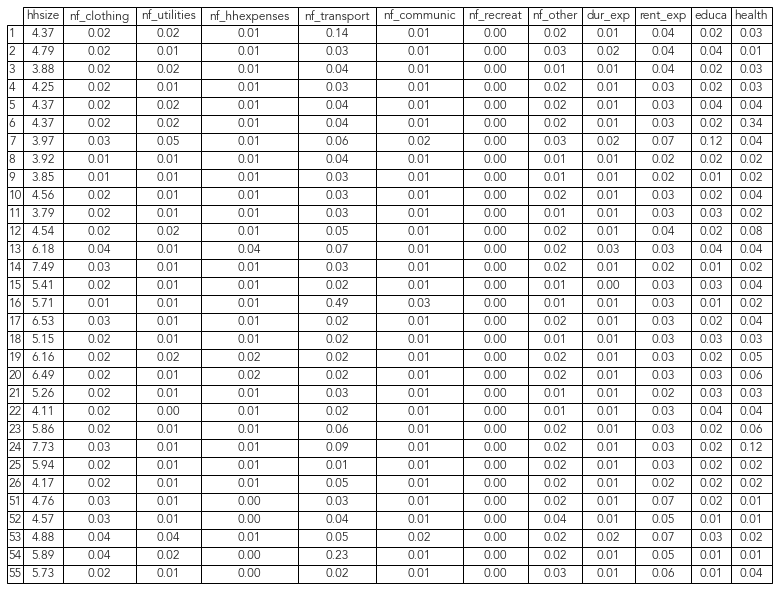

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axis('off')

# Plot the table with custom formatting, including the index
table = ax.table(cellText=consumption_averages.applymap(lambda x: f'{x:.2f}').values,
                 colLabels=consumption_averages.columns,
                 cellLoc='center',
                 loc='center',
                 rowLabels=consumption_averages.index.map(str))

# Customize table appearance (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust table size
table.auto_set_column_width([i for i in range(len(consumption_averages.columns) + 1)])  # Auto-adjust column widths

# Show the table
plt.show()

#### Regional Data

In [83]:
gdf['Region_Cod'] = gdf['Region_Cod'].astype(int)
consumption_data_w_energy = consumption_data_w_energy.merge(gdf, how = 'left', left_on = 'region', right_on = 'Region_Cod')
# consumption_data_w_energy.head()

In [84]:
consumption_data_w_energy

,y5_hhid,urban,region,district,hhsize,nf_clothing,nf_utilities,nf_hhexpenses,nf_transport,nf_communic,...,cooking_fuel,cooking_stove,lighting_fuel,electricity_source,Region_Cod_x,Region_Nam_x,geometry_x,Region_Cod_y,Region_Nam_y,geometry_y
0,1230-001-01,2,7,71,4,0.0,3938.08,0.0,24.96,72.0,...,Charcoal,manufactured,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6...",7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
1,1210-001-01,2,7,71,6,250.8,268.16,0.0,0.00,72.0,...,Gas,Other,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6...",7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
2,1249-001-01,2,7,71,4,112.0,321.60,7.2,748.80,144.0,...,Gas,Other,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6...",7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
3,1253-001-01,2,7,72,4,152.0,165.28,4.8,124.80,24.0,...,Charcoal,manufactured,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6...",7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
4,1291-001-01,2,7,71,5,140.0,447.52,48.8,166.40,120.0,...,Gas,Other,Electricity,Tanesco,7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6...",7.0,Dar es salaam,"MULTIPOLYGON (((39.12441 -6.56809, 39.12501 -6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,3300-001-01,2,53,531,7,238.0,733.76,168.0,480.00,72.0,...,Gas,Other,Electricity,Tanesco,53.0,Mjini Magharibi,"MULTIPOLYGON (((39.28220 -6.03920, 39.28277 -6...",53.0,Mjini Magharibi,"MULTIPOLYGON (((39.28220 -6.03920, 39.28277 -6..."
4705,3572-001-03,2,53,531,3,35.6,199.84,0.0,66.56,28.8,...,Charcoal,manufactured,Electricity,Tanesco,53.0,Mjini Magharibi,"MULTIPOLYGON (((39.28220 -6.03920, 39.28277 -6...",53.0,Mjini Magharibi,"MULTIPOLYGON (((39.28220 -6.03920, 39.28277 -6..."
4706,2387-001-01,2,51,511,4,44.0,74.08,0.0,0.00,19.2,...,Charcoal,other self-built,Solar,Solar Panels,51.0,Kaskazini Unguja,"MULTIPOLYGON (((39.38543 -5.82435, 39.38478 -5...",51.0,Kaskazini Unguja,"MULTIPOLYGON (((39.38543 -5.82435, 39.38478 -5..."
4707,3321-001-06,2,53,531,2,42.0,321.60,20.0,49.92,38.4,...,Gas,Other,Electricity,Tanesco,53.0,Mjini Magharibi,"MULTIPOLYGON (((39.28220 -6.03920, 39.28277 -6...",53.0,Mjini Magharibi,"MULTIPOLYGON (((39.28220 -6.03920, 39.28277 -6..."


In [33]:
# compute the household size to use to size the market
consumption_data_w_energy['hhsize'].mean()

4.904650668931833

In [34]:
# Create a geo dataframe
geo_df = gpd.GeoDataFrame(consumption_data_w_energy, geometry='geometry')

In [35]:
# Group by Region_Name and calculate the percentage of households with "no-electricity"
no_elec_pct = consumption_data_w_energy.groupby('Region_Nam')['electricity_source'].apply(lambda x: (x == 'no-electricity').mean() * 100)

# Group by Region_Name and calculate the percentage of households with grid
no_grid_pct = consumption_data_w_energy.groupby('Region_Nam')['electricity_source'].apply(lambda x: (x != 'Tanesco').mean() * 100)

In [129]:
no_grid_pct_expenditure = pd.DataFrame(no_grid_pct).merge(avg_monthly_exp, how = 'left', left_index = True, right_index = True).rename(columns = {'electricity_source':'pct_non_grid'})
no_grid_pct_expenditure

,pct_non_grid,avg_exp_monthly
Region_Nam,,
Arusha,38.914027,0.213314
Dar es salaam,21.794872,0.448586
Dodoma,61.825726,0.322600
Geita,77.868852,0.147371
Iringa,61.616162,0.185703
Kagera,78.500000,0.173984
Kaskazini Pemba,60.869565,0.409876
Kaskazini Unguja,60.493827,0.208585
Katavi,82.352941,0.247702


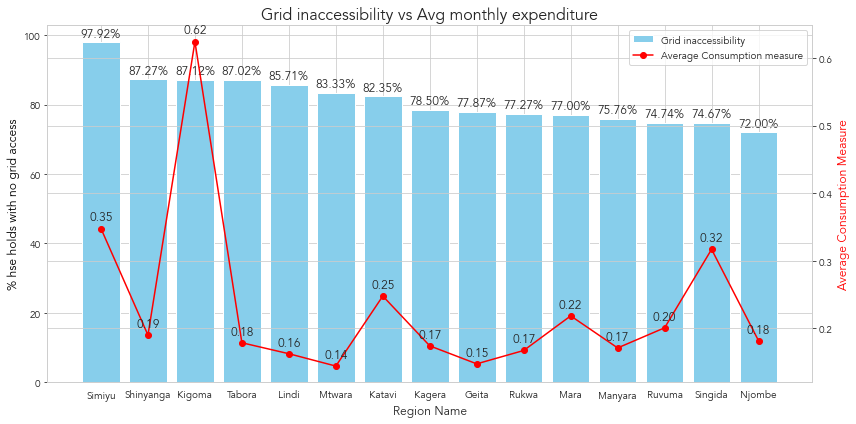

<Figure size 432x288 with 0 Axes>

In [150]:
# Sort the DataFrame by 'pct_non_grid' in descending order and select the first 15 rows
sorted_df = no_grid_pct_expenditure.sort_values(by='pct_non_grid', ascending=False).iloc[:15]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a bar chart using the 'pct_non_grid' column with less dramatic coloring
bars = ax1.bar(sorted_df.index, sorted_df['pct_non_grid'], color='skyblue', label='Grid inaccessibility')

# Annotate bar values
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset the label above the bar by 3 points
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize =12)

# Create a secondary axis (sharing the same x-axis)
ax2 = ax1.twinx()

# Create a line chart using the 'avg_exp_monthly' column
line, = ax2.plot(sorted_df.index, sorted_df['avg_exp_monthly'], color='red', marker='o', label='Average Consumption measure')

# Annotate line values
for x, y in zip(sorted_df.index, sorted_df['avg_exp_monthly']):
    ax2.annotate(f'{y:.2f}',  # Format the annotation as the value
                 xy=(x, y),
                 xytext=(0, 5),  # Offset the label above the point by 5 points
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize =12)

# Set labels and legends
ax1.set_xlabel('Region Name',fontsize = 12)
ax1.set_ylabel('% hse holds with no grid access', color='black',fontsize = 12)
ax2.set_ylabel('Average Consumption Measure', color='red',fontsize = 12)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the combined chart
plt.title('Grid inaccessibility vs Avg monthly expenditure', fontsize = 16)
plt.tight_layout()
plt.show()

current_directory = os.getcwd()
# Save the figure in the 'outputs' sub-folder
output_path = current_directory.replace('data_and_analysis','reports_and_output/') + 'cmbn_grid_inaccessibility_by_region' +'.png'
plt.savefig(output_path, dpi=300, format='png')

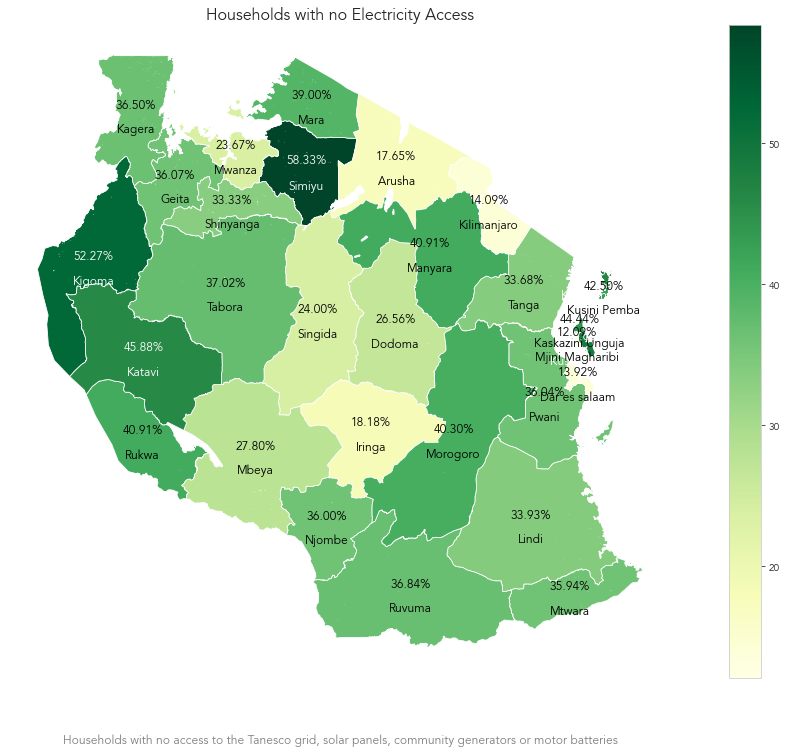

<Figure size 432x288 with 0 Axes>

In [36]:
chloro_plotter(map_df = no_elec_pct,
               main_title = 'Households with no Electricity Access',
               subtitle = 'Households with no access to the Tanesco grid, solar panels, community generators or motor batteries',
               fig_name = 'tz_no_electricity_access.png')

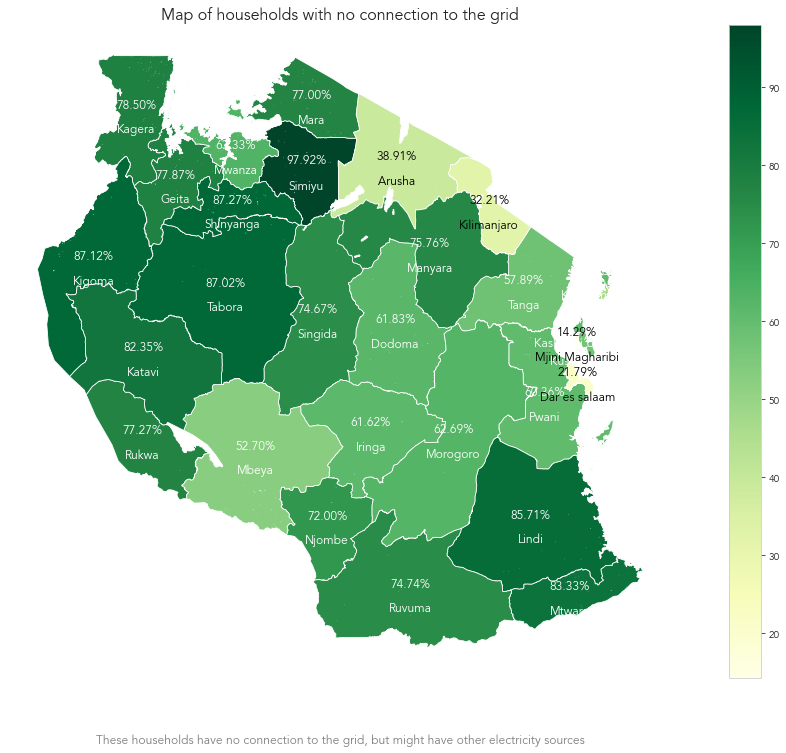

<Figure size 432x288 with 0 Axes>

In [37]:
chloro_plotter(map_df = no_grid_pct,
               main_title = 'Map of households with no connection to the grid',
               subtitle = 'These households have no connection to the grid, but might have other electricity sources',
               fig_name = 'tz_no_grid_access.png')

#### Earnings DATA

In [38]:
time_unit_wages = { 1:'Hour',
                    2:'Day',
                    3:'Week',
                    4:'Fortnight',
                    5:'Month',
                    6:'Quarter',
                    7:'Half Year',
                    8:'Year'}

In [39]:
# individual-level data on earnings/labour
hh_income = data_dict['hh_sec_e1'][['y5_hhid','indidy5','hh_e35a','hh_e35b','hh_e36','hh_e37a','hh_e37b','hh_e38','hh_e39','hh_e41','hh_e51a','hh_e51b','hh_e52','hh_e53a','hh_e53b','hh_e54' ]]

In [40]:
hh_income = hh_income.rename(columns = {    'hh_e35a':'pri_pay_amt',
                                            'hh_e35b':'pri_pay_period',
                                            'hh_e36':'pri_pay_nc',
                                            'hh_e37a':'pri_pay_nc_amt',
                                            'hh_e37b':'pri_pay_nc_period',
                                            'hh_e38':'months_per_yr',
                                            'hh_e39':'wks_per_month',
                                            'hh_e40':'hrs_per_wk',
                                            'hh_e41':'hrs_l7d',
                                            'hh_e51a':'sec_pay_amt',
                                            'hh_e51b':'sec_pay_period',
                                            'hh_e52':'sec_pay_nc',
                                            'hh_e53a':'sec_pay_nc_amt',
                                            'hh_e53b':'sec_pay_nc_period',
                                            'hh_e54':'hrs_l7d'})

In [41]:
hh_income = hh_income.fillna(1)

In [42]:
hh_income['pri_pay_period'].value_counts()

pri_pay_period
1.0    21225
2.0      993
5.0      971
3.0      340
4.0       48
6.0        8
8.0        6
7.0        1
Name: count, dtype: int64

In [43]:
# Dictionary mapping pri_pay_period to multiplier_pri_a
# Assumption: daily labourers work for 25 days
# multiplier_mapping = {
#     1: lambda row: row['wks_per_month'] * row['hrs_l7d'] * row['wks'],
#     2: 28,
#     3: lambda row: row['wks_per_month'],
#     4: 2,
#     5: 1,
#     6: 1 / 3,
#     7: 1 / 6,
#     8: 1 / 12
# }
#
# # Function to calculate multiplier_pri_a based on pri_pay_period
# def calculate_multiplier(row):
#     return multiplier_mapping.get(row['pri_pay_period'], 0)


#def calculate_multiplier(row, pay_period_column):
#    return multiplier_mapping.get(row[pay_period_column], 0)

In [44]:
# hh_income['multi_col_a'] = hh_income['wks_per_month'] * hh_income['hrs_l7d']


# cash income
# hh_income['multiplier_pri_a'] = hh_income.apply(calculate_multiplier, axis=1)
# hh_income['multiplier_pri_a'] = hh_income.apply(calculate_multiplier, axis=1)
# hh_income ['monthly_cash_pri'] = hh_income['multiplier_pri_a'] * hh_income['pri_pay_amt']


#hh_income[['pri_pay_amt']] * hh_income[['multiplier_pri_a']]

#### Energy Expenditure

In [45]:
energy_specific_exp = data_dict['hh_sec_k']

In [46]:
expenditure_items = {   201:'Kerosene',
                        202:'Electricity, including electricity vouchers',
                        203:'Gas (for lighting/cooking)',
                        205:'Petrol or diesel',
                        206:'Cell phone voucher',
                        207:'charcoal',
                        216:'Light bulbs',
                        414:'Lanterns',
                        419:'Electric/gas stove',
                        420:'Other stove',
                        421:'Water-heater'}

In [47]:
energy_specific_exp['energy_item'] = energy_specific_exp['itemcode'].map(expenditure_items).fillna('not_energy')

In [48]:
energy_specific_exp = energy_specific_exp[energy_specific_exp['hh_k01'] == 1.0].fillna(0)

In [49]:
# For the 3 items 101, 102 and 103 which are weekly, multiply by 4 to make it a monthly measure (approx)
energy_specific_exp['hh_k02'] = energy_specific_exp.apply(lambda row: row['hh_k02'] * 4 if row['itemcode'] in [101, 102, 103] else row['hh_k02'], axis=1)

In [50]:
monthly_spend = fx * pd.pivot_table(energy_specific_exp, values='hh_k02', index='y5_hhid', columns='energy_item', aggfunc='sum', fill_value=0)
# Add a column for total household expenditure
monthly_spend['total_expenditure'] = monthly_spend.sum(axis=1)
# Print the pivot table

In [51]:
monthly_spend_pct = pd.DataFrame(data = monthly_spend.iloc[:,:-1].values / monthly_spend.iloc[:,-1:].values,
             index = monthly_spend.index,
             columns = monthly_spend.iloc[:,:-1].columns)

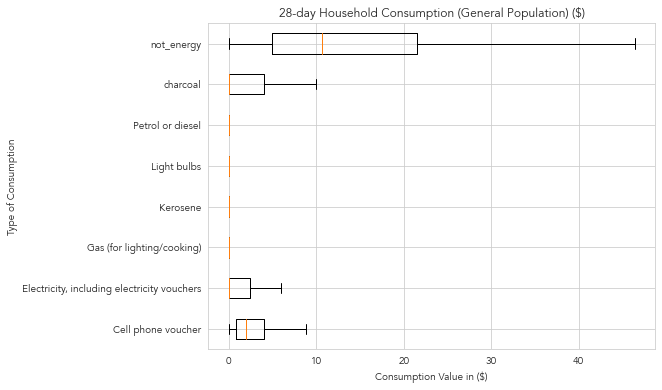

In [52]:
plt.figure(figsize=(8, 6))
plt.boxplot(monthly_spend.iloc[:,:-1].values,
            labels = monthly_spend.iloc[:,:-1].columns,
            vert=False,
            showfliers = False)
#plt.xticks(range(0, 2500, 200))
plt.title('28-day Household Consumption (General Population) ($)')
plt.xlabel('Consumption Value in ($)')
plt.ylabel('Type of Consumption')
plt.show()
#plt.savefig('hh_consumption.png', dpi = 300, format = 'png')

In [53]:
non_elec_hh = consumption_data_w_energy[consumption_data_w_energy['electricity_source'] != 'Tanesco'][['y5_hhid','lighting_fuel','electricity_source']]

In [54]:
non_elec_hh.merge(energy_specific_exp,how = 'left')

,y5_hhid,lighting_fuel,electricity_source,interview__key,itemcode,hh_k01,hh_k02,energy_item
0,1309-001-01,Torch,no-electricity,96-10-67-72,102.0,1.0,800.0,not_energy
1,1309-001-01,Torch,no-electricity,96-10-67-72,103.0,1.0,52000.0,not_energy
2,1309-001-01,Torch,no-electricity,96-10-67-72,203.0,1.0,20000.0,Gas (for lighting/cooking)
3,1309-001-01,Torch,no-electricity,96-10-67-72,204.0,1.0,20000.0,not_energy
4,1309-001-01,Torch,no-electricity,96-10-67-72,205.0,1.0,88000.0,Petrol or diesel
...,...,...,...,...,...,...,...,...
20331,2387-001-01,Solar,Solar Panels,12-35-23-78,206.0,1.0,4000.0,Cell phone voucher
20332,2387-001-01,Solar,Solar Panels,12-35-23-78,207.0,1.0,15000.0,charcoal
20333,2387-001-01,Solar,Solar Panels,12-35-23-78,209.0,1.0,2800.0,not_energy
20334,2387-001-01,Solar,Solar Panels,12-35-23-78,210.0,1.0,2400.0,not_energy


In [55]:
monthly_spend_no_elec = fx * pd.pivot_table(non_elec_hh.merge(energy_specific_exp,how = 'left'), values='hh_k02', index='y5_hhid', columns='energy_item', aggfunc='sum', fill_value=0)
# Add a column for total household expenditure
monthly_spend_no_elec['total_expenditure'] = monthly_spend_no_elec.sum(axis=1)
# Print the pivot table

In [56]:
monthly_spend_no_elec

energy_item,Cell phone voucher,"Electricity, including electricity vouchers",Gas (for lighting/cooking),Kerosene,Light bulbs,Petrol or diesel,charcoal,not_energy,total_expenditure
y5_hhid,,,,,,,,,
1000-001-01,0.4,0.0,0.0,0.0,0.0,0.0,0.0,4.32,4.72
1000-001-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.64
1000-001-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.12,9.12
1001-001-01,1.6,0.0,0.0,0.0,0.0,0.0,0.0,1.08,2.68
1002-001-01,9.6,0.0,0.0,0.0,0.0,0.0,0.0,3.80,13.40
...,...,...,...,...,...,...,...,...,...
9798-001-99,4.0,0.0,0.0,0.0,0.0,0.0,1.6,12.68,18.28
9799-001-99,4.0,0.0,0.0,0.4,0.0,0.0,8.0,30.80,43.20
9805-001-99,12.0,0.0,0.0,0.0,0.0,0.0,24.0,118.04,154.04


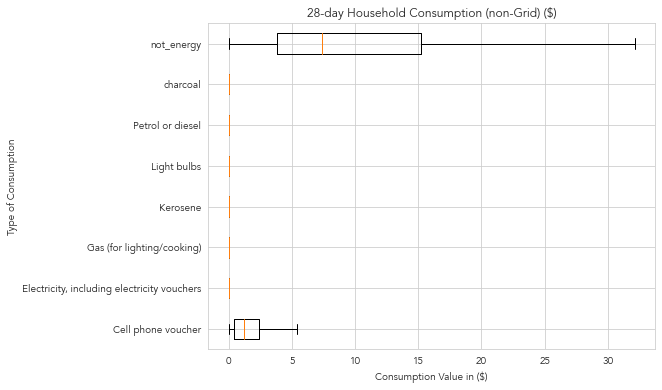

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(8, 6))
plt.boxplot(monthly_spend_no_elec.iloc[:,:-1].values,
            labels = monthly_spend_no_elec.iloc[:,:-1].columns,
            vert=False,
            showfliers = False)
#plt.xticks(range(0, 2500, 200))
plt.title('28-day Household Consumption (non-Grid) ($)')
plt.xlabel('Consumption Value in ($)')
plt.ylabel('Type of Consumption')
plt.show()
# Get the current working directory
current_directory = os.getcwd()
# Save the figure in the 'outputs' sub-folder
output_path = current_directory.replace('data_and_analysis','reports_and_output/') + 'bxplt_monthly_household_consumption'+'.png'
plt.savefig(output_path, dpi=300, format='png')
#plt.savefig('hh_consumption.png', dpi = 300, format = 'png')

In [58]:
monthly_spend_no_elec_pct = pd.DataFrame(data = monthly_spend_no_elec.iloc[:,:-1].values / monthly_spend_no_elec.iloc[:,-1:].values,
             index = monthly_spend_no_elec.index,
             columns = monthly_spend_no_elec.iloc[:,:-1].columns)

In [59]:
monthly_spend_no_elec_pct

energy_item,Cell phone voucher,"Electricity, including electricity vouchers",Gas (for lighting/cooking),Kerosene,Light bulbs,Petrol or diesel,charcoal,not_energy
y5_hhid,,,,,,,,
1000-001-01,0.084746,0.0,0.0,0.000000,0.0,0.0,0.000000,0.915254
1000-001-02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
1000-001-03,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
1001-001-01,0.597015,0.0,0.0,0.000000,0.0,0.0,0.000000,0.402985
1002-001-01,0.716418,0.0,0.0,0.000000,0.0,0.0,0.000000,0.283582
...,...,...,...,...,...,...,...,...
9798-001-99,0.218818,0.0,0.0,0.000000,0.0,0.0,0.087527,0.693654
9799-001-99,0.092593,0.0,0.0,0.009259,0.0,0.0,0.185185,0.712963
9805-001-99,0.077902,0.0,0.0,0.000000,0.0,0.0,0.155804,0.766294


In [60]:
def horizontal_bars(df,
                    title,
                    xlab,
                    ylab,
                    fig_name):
    """df is a pivot table that has expenditure types as columns. Expenditure types are %ages of the total expenditure for the household"""
    # Calculate the mean values
    mean_values = df.mean()
    sorted_columns = mean_values.sort_values(ascending=True).index
    sorted_df = df[sorted_columns]

    # Create horizontal bar plots for each column
    plt.figure(figsize=(8, 6))

    # Iterate over each column and create a horizontal bar plot
    for idx, column in enumerate(sorted_df.columns):
        mean_value = sorted_df[column].mean()
        plt.barh(idx, mean_value, color='skyblue', label=column)
        plt.text(mean_value, idx, f'{mean_value:.2%}', va='center', ha='left', color='black', fontweight='bold', fontsize=12)

    # Set y-axis ticks and labels
    plt.yticks(range(len(sorted_df.columns)), sorted_df.columns)
    plt.xlabel(xlab)
    plt.title(title)

    plt.show()

    # Get the current working directory
    current_directory = os.getcwd()
    # Save the figure in the 'outputs' sub-folder
    output_path = current_directory.replace('data_and_analysis','reports_and_output/') + fig_name + '.png'
    plt.savefig(output_path, dpi=300, format='png')

In [61]:
# Monthly non-food expenditure for non-grid households
# useful to detemine who can afford
monthly_spend_no_elec['total_expenditure'].mean()

18.90191785584933

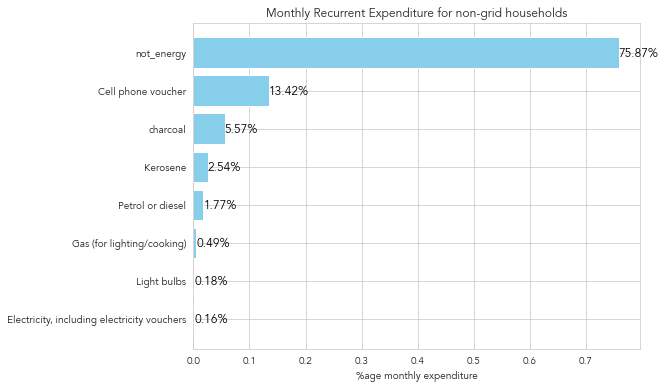

<Figure size 432x288 with 0 Axes>

In [62]:
horizontal_bars(df = monthly_spend_no_elec_pct,
                title = 'Monthly Recurrent Expenditure for non-grid households',
                xlab = '%age monthly expenditure',
                ylab = 'expenditure',
                fig_name= 'hbp_monthly_recur_exp_non_grid'
                )

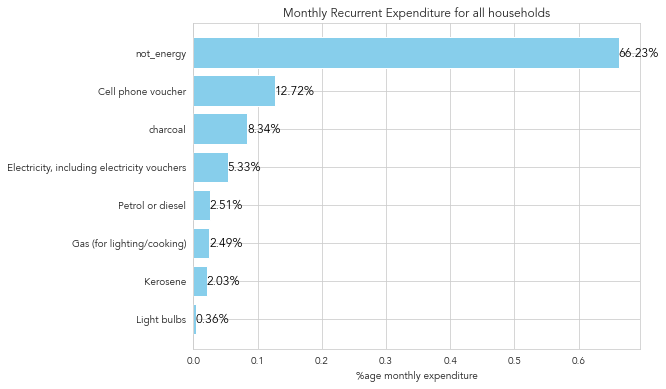

<Figure size 432x288 with 0 Axes>

In [63]:
horizontal_bars(df = monthly_spend_pct,
                title = 'Monthly Recurrent Expenditure for all households',
                xlab = '%age monthly expenditure',
                ylab = 'expenditure',
                fig_name= 'hbp_monthly_recur_exp_all')

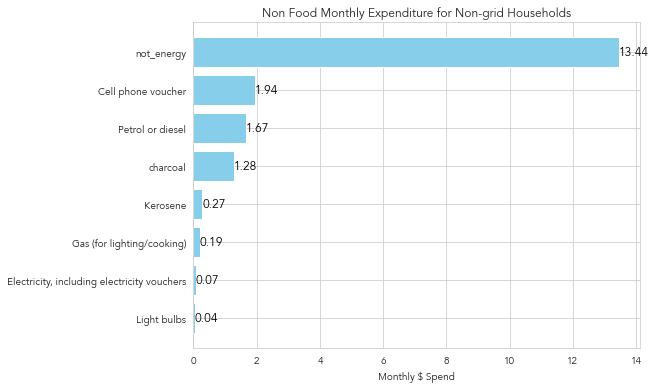

<Figure size 432x288 with 0 Axes>

In [64]:
mean_values = monthly_spend_no_elec.iloc[:,:-1].mean()
sorted_columns = mean_values.sort_values(ascending=True).index
sorted_df = monthly_spend_no_elec[sorted_columns]

# Create horizontal bar plots for each column
plt.figure(figsize=(8, 6))

# Iterate over each column and create a horizontal bar plot
for idx, column in enumerate(sorted_df.columns):
    mean_value = sorted_df[column].mean()
    plt.barh(idx, mean_value, color='skyblue', label=column)
    plt.text(mean_value, idx, f'{mean_value:.2f}', va='center', ha='left', color='black', fontweight='bold', fontsize=12)

# Set y-axis ticks and labels
plt.yticks(range(len(sorted_df.columns)), sorted_df.columns)
plt.xlabel('Monthly $ Spend')
plt.title('Non Food Monthly Expenditure for Non-grid Households')

plt.show()

# Get the current working directory
current_directory = os.getcwd()
# Save the figure in the 'outputs' sub-folder
output_path = current_directory.replace('data_and_analysis','reports_and_output/') + 'hbp_non_f_monthly_spend_non_grid'+ '.png'
plt.savefig(output_path, dpi=300, format='png')


#### Hse Hold Assets data

In [65]:
data_dict.keys()

dict_keys(['hh_sec_q1', 'hh_sec_q2', 'hh_sec_e3', 'hh_sec_e2', 'hh_sec_e1', 'hh_sec_i2', 'hh_sec_a', 'hh_sec_v', 'hh_sec_c', 'hh_sec_b', 'hh_sec_ja1', 'hh_sec_f', 'hh_sec_p', 'hh_sec_g', 'hh_sec_o2', 'hh_sec_r', 'hh_sec_s', 'hh_sec_d', 'hh_sec_o1', 'hh_sec_u2', 'hh_sec_i', 'hh_sec_h', 'hh_sec_k', 'consumption_real_y5', 'consumption_real_y4', 'hh_sec_n', 'hh_sec_l', 'hh_sec_m', 'hh_sec_j3', 'hh_sec_j1', 'hh_sec_j4'])

In [66]:
m_hh_assets = data_dict['hh_sec_m']
m_hh_assets.iloc[:,6:] = m_hh_assets.iloc[:,6:] * fx
m_hh_assets

,interview__key,y5_hhid,itemcode,hh_m00,hh_m01,hh_m02,hh_m03,hh_m04
0,39-26-37-98,1000-001-01,401,2.0,0.0,NaN,NaN,NaN
1,39-26-37-98,1000-001-01,402,2.0,0.0,NaN,NaN,NaN
2,39-26-37-98,1000-001-01,403,1.0,2.0,0.0,24.0,20.0
3,39-26-37-98,1000-001-01,404,2.0,0.0,NaN,NaN,NaN
4,39-26-37-98,1000-001-01,405,2.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
263699,53-69-11-30,9811-001-99,452,2.0,0.0,NaN,NaN,NaN
263700,53-69-11-30,9811-001-99,453,2.0,0.0,NaN,NaN,NaN
263701,53-69-11-30,9811-001-99,454,2.0,0.0,NaN,NaN,NaN
263702,53-69-11-30,9811-001-99,455,2.0,0.0,NaN,NaN,NaN


In [67]:
#Item and category dictionary to interpret the item code:
item_dict_1 = {401:'Radio and Radio Cassette',
402:'Telephone(landline)',
403:'Telephone(mobile)',
404:'Refridgerator or freezer',
405:'Sewing Machine',
406:'Television',
407:'Video/DVD',
408:'Chairs',
409:'Sofas',
410:'Tables',
411:'Watches',
412:'Beds',
413:'Cupboards, chest-of-drawers, boxes, wardrobes,bookcases',
414:'Lanterns',
415:'Computer',
416:'Cooking pots, Cups, other kitchen utencils',
417:'Mosquito net',
418:'Iron (Charcoal or electric)',
419:'Electric/gas stove',
420:'Other stove',
421:'Water-heater',
422:'Record/cassette player, tape recorder',
423:'Complete music system',
424:'Books (not school books)',
425:'Motor Vehicles',
426:'Motorcycle',
427:'Bicycle',
428:'Carts',
429:'Animal-drawn cart',
430:'Boat/canoe',
431:'Wheel barrow',
432:'Livestock',
433:'Poultry',
434:'Outboard engine',
435:'Donkeys',
436:'Fields/Land',
437:'House(s)',
438:'Fan/Air conditioner',
439:'Dish antena/decoder',
440:'Hoes',
441:'Spraying machine',
442:'Water pumping set',
443:'Reapers',
444:'Tractor',
445:'Trailer for tractors etc.',
446:'Plough etc.',
447:'Harrow',
448:'Milking machine',
449:'Harvesting and threshing machine',
450:'Hand milling machine',
451:'Coffee pulping machine',
452:'Fertilizer distributor',
453:'Power tiller',
454:'Bajaj/Toyo',
455:'Guta',
456:'Incubator'}

category_dict_1 = {401:'Appliances & Electronics',
402:'Appliances & Electronics',
403:'Appliances & Electronics',
404:'Appliances & Electronics',
405:'Appliances & Electronics',
406:'Appliances & Electronics',
407:'Appliances & Electronics',
408:'Furniture & utencils',
409:'Furniture & utencils',
410:'Furniture & utencils',
411:'Appliances & Electronics',
412:'Furniture & utencils',
413:'Furniture & utencils',
414:'Appliances & Electronics',
415:'Appliances & Electronics',
416:'Furniture & utencils',
417:'Furniture & utencils',
418:'Appliances & Electronics',
419:'Appliances & Electronics',
420:'Appliances & Electronics',
421:'Appliances & Electronics',
422:'Appliances & Electronics',
423:'Appliances & Electronics',
424:'Furniture & utencils',
425:'Transport & Tools',
426:'Transport & Tools',
427:'Transport & Tools',
428:'Transport & Tools',
429:'Transport & Tools',
430:'Transport & Tools',
431:'Transport & Tools',
432:'Bio-Assets',
433:'Bio-Assets',
434:'Transport & Tools',
435:'Bio-Assets',
436:'Land',
437:'Land',
438:'Appliances & Electronics',
439:'Appliances & Electronics',
440:'Transport & Tools',
441:'Transport & Tools',
442:'Transport & Tools',
443:'Transport & Tools',
444:'Transport & Tools',
445:'Transport & Tools',
446:'Transport & Tools',
447:'Transport & Tools',
448:'Transport & Tools',
449:'Transport & Tools',
450:'Transport & Tools',
451:'Transport & Tools',
452:'Transport & Tools',
453:'Transport & Tools',
454:'Transport & Tools',
455:'Transport & Tools',
456:'Transport & Tools'}

In [68]:
m_hh_assets['item'] = m_hh_assets['itemcode'].map(item_dict_1).fillna('other')
m_hh_assets['item_class'] = m_hh_assets['itemcode'].map(category_dict_1).fillna('other')


In [69]:
m_hh_assets['total_value'] = m_hh_assets['hh_m01'] * m_hh_assets['hh_m04']

In [70]:
m_hh_assets

,interview__key,y5_hhid,itemcode,hh_m00,hh_m01,hh_m02,hh_m03,hh_m04,item,item_class,total_value
0,39-26-37-98,1000-001-01,401,2.0,0.0,NaN,NaN,NaN,Radio and Radio Cassette,Appliances & Electronics,NaN
1,39-26-37-98,1000-001-01,402,2.0,0.0,NaN,NaN,NaN,Telephone(landline),Appliances & Electronics,NaN
2,39-26-37-98,1000-001-01,403,1.0,2.0,0.0,24.0,20.0,Telephone(mobile),Appliances & Electronics,40.0
3,39-26-37-98,1000-001-01,404,2.0,0.0,NaN,NaN,NaN,Refridgerator or freezer,Appliances & Electronics,NaN
4,39-26-37-98,1000-001-01,405,2.0,0.0,NaN,NaN,NaN,Sewing Machine,Appliances & Electronics,NaN
...,...,...,...,...,...,...,...,...,...,...,...
263699,53-69-11-30,9811-001-99,452,2.0,0.0,NaN,NaN,NaN,Fertilizer distributor,Transport & Tools,NaN
263700,53-69-11-30,9811-001-99,453,2.0,0.0,NaN,NaN,NaN,Power tiller,Transport & Tools,NaN
263701,53-69-11-30,9811-001-99,454,2.0,0.0,NaN,NaN,NaN,Bajaj/Toyo,Transport & Tools,NaN
263702,53-69-11-30,9811-001-99,455,2.0,0.0,NaN,NaN,NaN,Guta,Transport & Tools,NaN


In [71]:
hh_assets_total = pd.pivot_table(m_hh_assets, values='total_value', index='y5_hhid', columns='item_class', aggfunc='sum', fill_value=0)

In [72]:
hh_appliances_total = pd.pivot_table(m_hh_assets[m_hh_assets['item_class'] == 'Appliances & Electronics'], values = 'total_value', index = 'y5_hhid', columns = 'item', aggfunc = 'sum', fill_value = 0)

In [73]:
hh_appliances_total

item,Complete music system,Computer,Dish antena/decoder,Electric/gas stove,Fan/Air conditioner,Iron (Charcoal or electric),Lanterns,Other stove,Radio and Radio Cassette,"Record/cassette player, tape recorder",Refridgerator or freezer,Sewing Machine,Telephone(landline),Telephone(mobile),Television,Video/DVD,Watches,Water-heater
y5_hhid,,,,,,,,,,,,,,,,,,
1000-001-01,0.0,0,0.0,0.0,0.0,4.0,0,0.8,0.0,0,0,0.0,0,40.0,0.0,0.0,0.0,0.0
1000-001-02,0.0,0,0.0,0.0,0.0,0.0,0,1.2,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1000-001-03,0.0,0,0.0,0.0,0.0,0.0,0,0.0,6.0,0,0,0.0,0,4.0,0.0,0.0,0.0,0.0
1000-001-06,0.0,0,0.0,12.0,0.0,0.0,0,1.2,0.0,0,0,0.0,0,16.0,0.0,0.0,0.0,0.0
1001-001-01,0.0,0,0.0,0.0,0.0,0.0,0,0.0,12.0,0,0,0.0,0,14.0,80.0,0.0,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807-001-99,0.0,0,0.0,12.0,0.0,0.0,0,0.0,40.0,0,0,0.0,0,88.0,0.0,0.0,0.0,0.0
9808-001-99,0.0,0,4.0,18.0,8.0,4.0,0,1.6,40.0,0,60,0.0,0,144.0,40.0,12.0,4.0,4.0
9809-001-99,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0,12.0,0.0,0.0,0.0,0.0


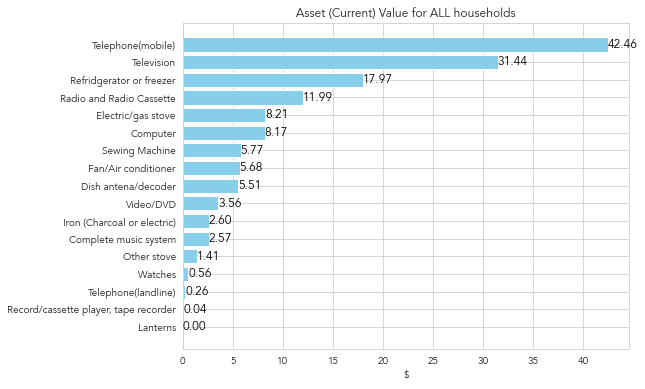

<Figure size 432x288 with 0 Axes>

In [74]:
mean_values = hh_appliances_total.iloc[:,:-1].mean()
sorted_columns = mean_values.sort_values(ascending=True).index
sorted_df = hh_appliances_total[sorted_columns]

# Create horizontal bar plots for each column
plt.figure(figsize=(8, 6))

# Iterate over each column and create a horizontal bar plot
for idx, column in enumerate(sorted_df.columns):
    mean_value = sorted_df[column].mean()
    plt.barh(idx, mean_value, color='skyblue', label=column)
    plt.text(mean_value, idx, f'{mean_value:.2f}', va='center', ha='left', color='black', fontweight='bold', fontsize=12)

# Set y-axis ticks and labels
plt.yticks(range(len(sorted_df.columns)), sorted_df.columns)
plt.xlabel('$')
plt.title('Asset (Current) Value for ALL households')

plt.show()

# Get the current working directory
current_directory = os.getcwd()
# Save the figure in the 'outputs' sub-folder
output_path = current_directory.replace('data_and_analysis','reports_and_output/') + 'hbp_hh_assets_all' + '.png'
plt.savefig(output_path, dpi=300, format='png')